In [34]:
# @author : Kalyan Ghosh 

# Task 1 -- Basic Statistical Analysis

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from pathlib import Path
import pylab as pl
from scipy import stats

data_folder = Path("C:/Users/Kalyan/Desktop/NCSU/3rd Semester/IOT Analytics 592/Project2/data/")
file_to_open = data_folder / "kghosh.csv"


class Basic_Statistical_Analysis:
    
    def __init__(self,file_to_open):
        
        self.file_to_open=file_to_open
        
    
    def hist_mean_variance(self):
        
        data=pd.read_csv(file_to_open,skiprows=None,header=None)

        df = pd.DataFrame(data)
        
        X1 = df.iloc[:,0]
        X2 = df.iloc[:,1]
        X3 = df.iloc[:,2]
        X4 = df.iloc[:,3]
        X5 = df.iloc[:,4]
        Y  = df.iloc[:,5]
        
        #plot histograms
        
        '''
        hist1 = X1.hist()
        hist2 = X2.hist()
        hist3 = X3.hist()
        hist4 = X4.hist()
        hist5 = X5.hist()
        '''
        
        #pl.suptitle("Histogram")
        
        #1.1
        #calculate the mean
        
        print ("Mean of X1= ",X1.mean())
        print ("Mean of X2= ",X2.mean())
        print ("Mean of X3= ",X3.mean())
        print ("Mean of X4= ",X4.mean())
        print ("Mean of X5= ",X5.mean())
        
        #calculate the variance
        print ("***************************************")
        
        print ("Variance of X1= ",X1.var())
        print ("Variance of X2= ",X2.var())
        print ("Variance of X3= ",X3.var())
        print ("Variance of X4= ",X4.var())
        print ("Variance of X5= ",X5.var())
        
        print ("***************************************")
        
        #1.2
        #create boxplots
        X1=pd.DataFrame(X1)
        X2=pd.DataFrame(X2)
        X3=pd.DataFrame(X3)
        X4=pd.DataFrame(X4)
        X5=pd.DataFrame(X5)

        #pl.suptitle("Box Plot of X1")
        #pd.DataFrame(X5).boxplot()
        
        #1.3
        #create correlation matrix
        print ("Correlation Matrix for all variables:")
        print ("***************************************")
        print(df.corr())
        
       

obj=Basic_Statistical_Analysis(file_to_open)
obj.hist_mean_variance()
        
        

Mean of X1=  40.371115600000024
Mean of X2=  97.83115999999994
Mean of X3=  150.10245333333322
Mean of X4=  234.0766333333334
Mean of X5=  270.21036666666674
***************************************
Variance of X1=  317.1666478839704
Variance of X2=  313.77130760642143
Variance of X3=  284.50412926537336
Variance of X4=  316.84342842697873
Variance of X5=  278.6509614035675
***************************************
Correlation Matrix for all variables:
***************************************
          0         1         2         3         4         5
0  1.000000 -0.054110  0.058261 -0.055625  0.067539  0.956172
1 -0.054110  1.000000  0.041512  0.056898 -0.001131 -0.012087
2  0.058261  0.041512  1.000000 -0.020289 -0.053005  0.085689
3 -0.055625  0.056898 -0.020289  1.000000 -0.048236 -0.005024
4  0.067539 -0.001131 -0.053005 -0.048236  1.000000  0.133062
5  0.956172 -0.012087  0.085689 -0.005024  0.133062  1.000000


40.371115600000024 6582.923000000002
0.9142657792754072


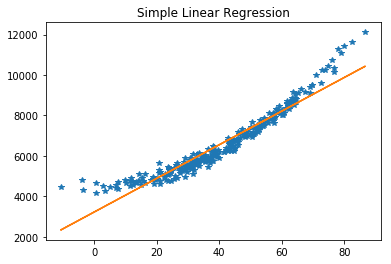

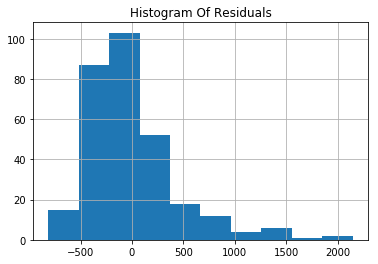

In [42]:
# Task 2 -- Simple Linear Regression

# Model the dataset with a simple linear regression model Y=a0+a1X1+epsilon

class Simple_Linear_Regression:
    
    def __init__(self,file_to_open):
        
        self.file_to_open=file_to_open
        
    def linear_regression(self):
        
        data=pd.read_csv(file_to_open,skiprows=None,header=None)
        df = pd.DataFrame(data)
        
        X1 = df.iloc[:,0]
        Y  = df.iloc[:,5]
        
        #2.1 Determine the estimates of a0, a1, sigma^2
        
        meanX1=X1.mean()
        meanY=Y.mean()
        print (meanX1,meanY)
        
        X1_i_minus_meanX1=X1.subtract(meanX1)
        Y_i_minus_meanY=Y.subtract(meanY)
        X1_i_minus_meanX1_squared=X1_i_minus_meanX1**2
        numerator=sum(X1_i_minus_meanX1*Y_i_minus_meanY)
        denominator=sum(X1_i_minus_meanX1_squared)
        a1=(numerator/denominator)
        a0=(meanY-a1*meanX1)
        
        Y_i=a0+(a1*X1)
        e_i=pd.DataFrame(Y-Y_i)
        error_variance=e_i.var()
        #print (error_variance)
        
        
        #***************************************************************#
        
        #2.2 Check the p-values, R**2, and F value to determine if the regression coefficients are significant
        
        ssreg = np.sum((Y_i-meanY)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
        sstot = np.sum((Y - meanY)**2)    # or sum([ (yi - ybar)**2 for yi in y])
        R_squared = ssreg / sstot
        
        print (R_squared)
        
        #***************************************************************#
        
        #2.3 Plotting a Simple Linear Regression Model
        
        plt.plot(X1,Y,'*')
        plt.plot(X1,Y_i, '-')
        plt.title("Simple Linear Regression")
        
        #***************************************************************#
        
        #2.4 i > Draw histogram of the residuals
        e_i.hist()
        plt.title("Histogram Of Residuals")
        

        
obj=Simple_Linear_Regression(file_to_open)
obj.linear_regression()